In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.animation as ani
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from pathlib import Path

# Load the file into a dataframe and checkout the structure
projectDir = Path('.').resolve().parents[2]

# Read in CSV file, Convert NaN values to 0's
df = pd.read_csv(f'{projectDir}/data/processed/tsa/throughput/TsaThroughput.LAS.csv', header='infer')
df.fillna(0, inplace=True)
df.Date = pd.to_datetime(df['Date'])

# Sum up the amount numbers by day for our graph
df['Total'] = df.sum(axis = 1, skipna = True)

In [2]:
dfg = df.groupby('Date', as_index=False).agg({'Total': 'sum'})

In [3]:
def setupChart(plt):
	plt.xticks(rotation=45, ha="right", rotation_mode="anchor") #rotate the x-axis values
	
	ax = plt.gca()
	
	ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
	ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
	ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

	ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
	ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

	plt.title('LAS TSA Throughput by Date', fontsize=24)
	plt.ylabel('Number of Passengers', fontsize=16)
	plt.xlabel('Date', fontsize=16)

	plt.grid(True)

	return plt

In [4]:
def buildAreaChart(plt, df):
	plt.stackplot(df['Date'], df['Total'], labels='Total', colors='blue')
	return plt

In [5]:
def buildLineChart(plt, df):
	plt.plot(df['Date'], df['Total'], color='blue', label='Total')

	return plt

In [6]:
def animateChart(i = int):
	p = plt.plot(dfg.loc[:i,'Date'], dfg.loc[:i, 'Total'])

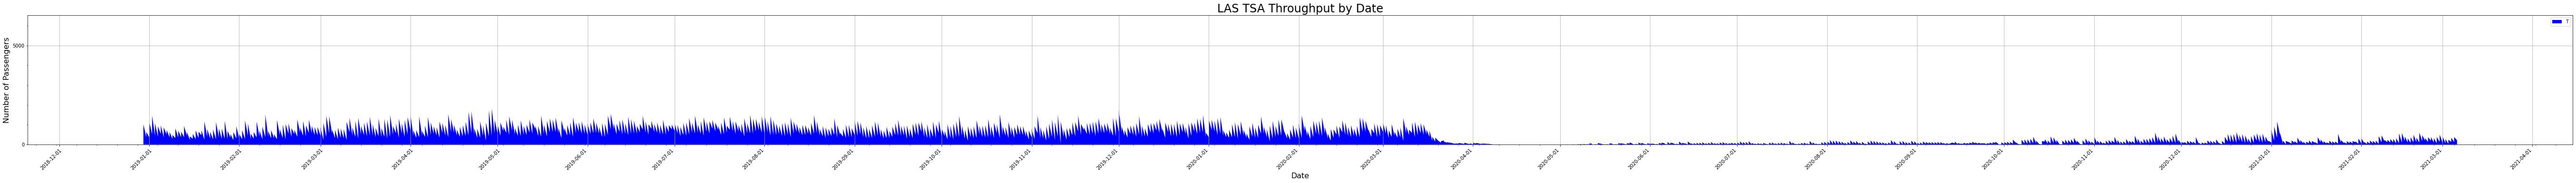

<Figure size 432x288 with 0 Axes>

In [7]:
fig, ax = plt.subplots(figsize=(96, 5))

plt = setupChart(plt)
plt.stackplot(df['Date'], df['Total'], labels='Total', colors='blue')
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure1-AreaSCP345.jpg')


<Figure size 432x288 with 0 Axes>

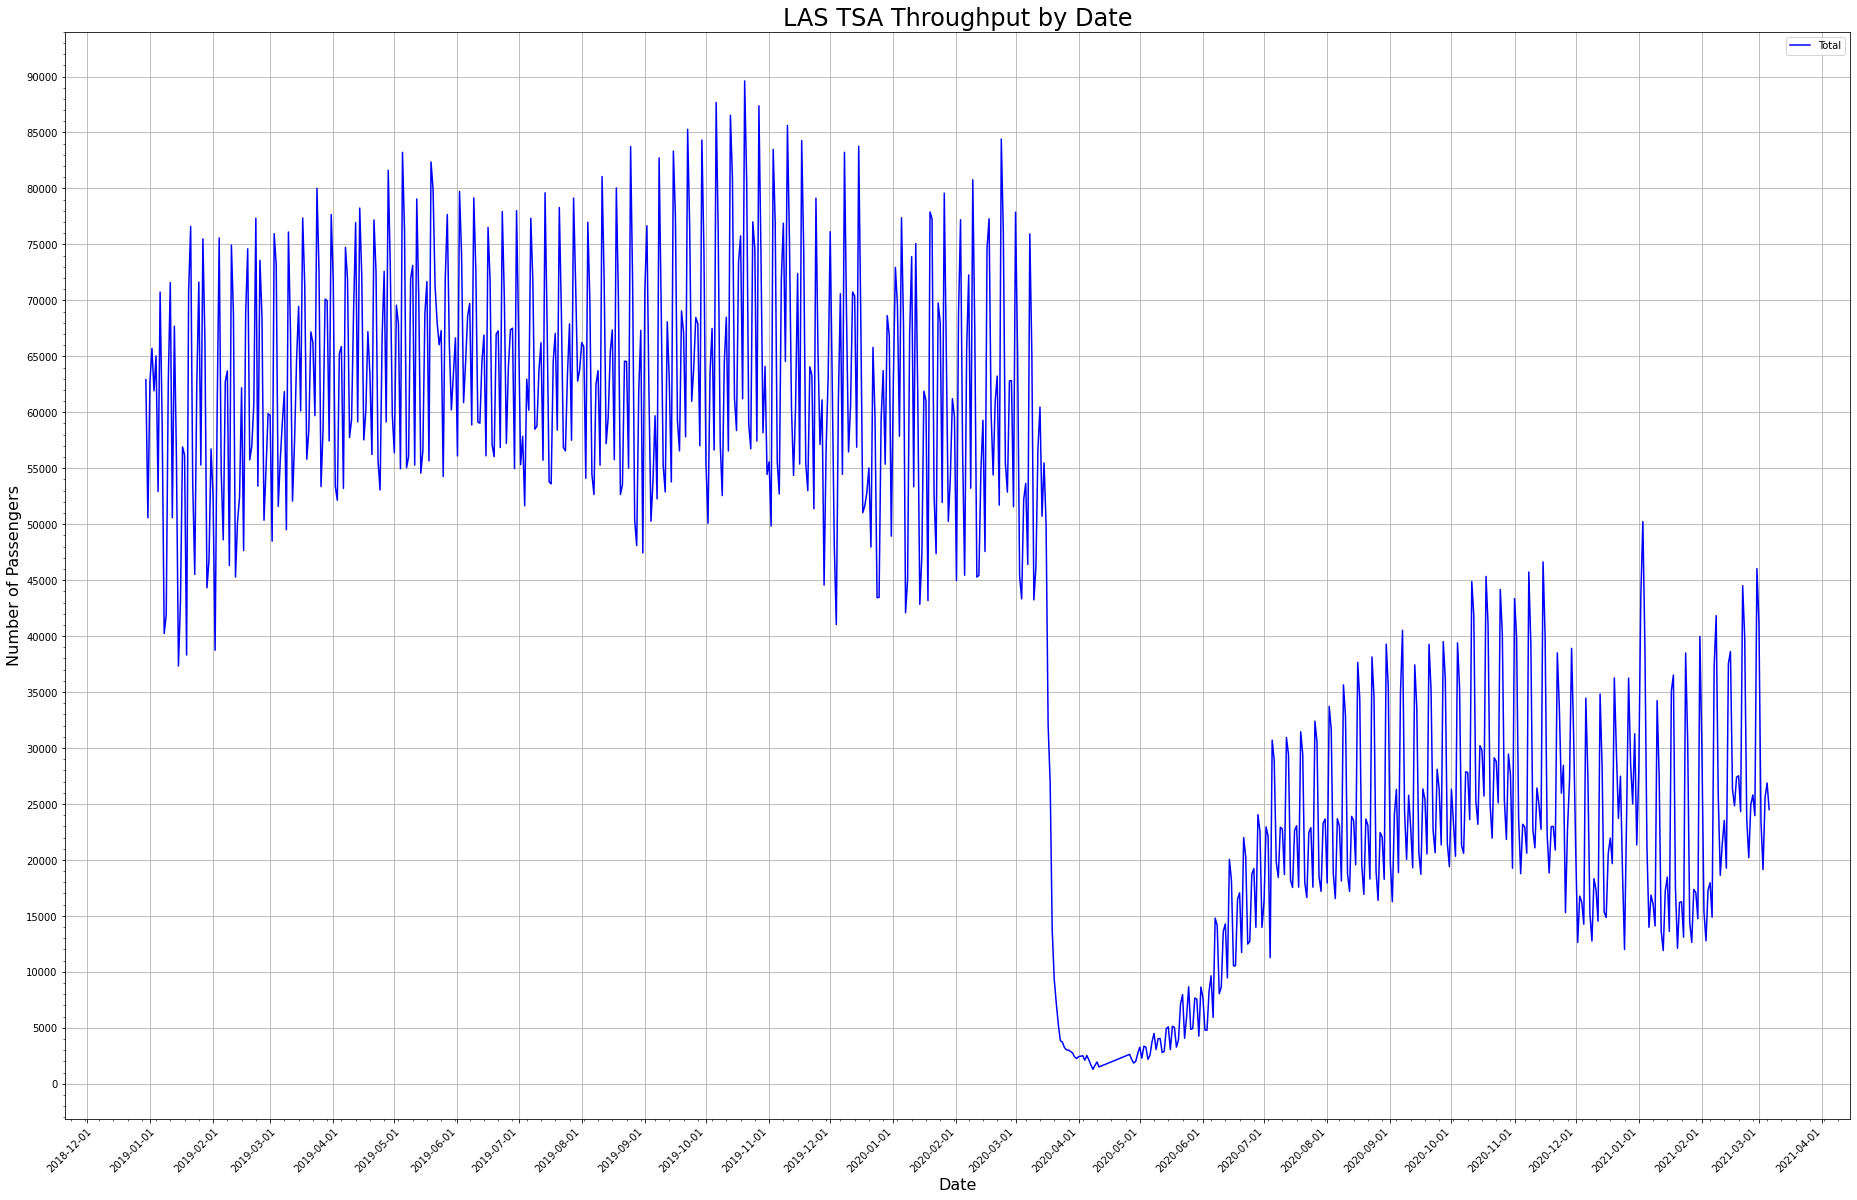

<Figure size 432x288 with 0 Axes>

In [8]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))



plt = setupChart(plt)
plt = buildLineChart(plt, dfg)
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure2-LineSCP345.jpg')

In [ ]:
plt.clf()
fig, ax = plt.subplots(figsize=(32, 20))

plt = setupChart(plt)
plt = buildLineChart(plt, dfg, labels, colors)
plt.legend()
plt.show()
plt.savefig(r'/mnt/c/tmp/figure3-LineSCP12FIS.jpg')

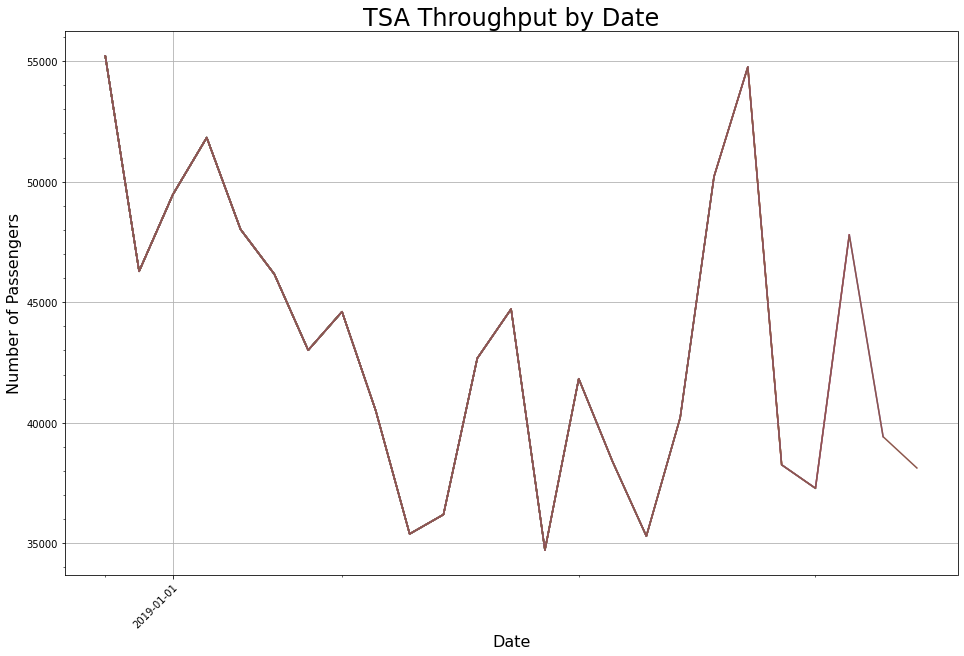

In [16]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.xticks(rotation=45, ha="right", rotation_mode="anchor")


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=7))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1000))

plt.title('TSA Throughput by Date', fontsize=24)
plt.ylabel('Number of Passengers', fontsize=16)
plt.xlabel('Date', fontsize=16)

plt.grid(True)

animation = ani.FuncAnimation(fig, animateChart, frames=25, interval=50)
animation.save(r'/mnt/c/tmp/animation.gif', "ffmpeg")
